In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats.contingency import crosstab, chi2_contingency
from scipy.stats import ranksums, iqr
import pingouin as pg
import warnings
from statsmodels.stats.weightstats import ztest
from math import sqrt
import scorecardpy as sc

import visualization as viz

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
data = pd.read_csv("data/cs-training.csv")

In [5]:
data = data.rename(columns={"NumberOfTime30-59DaysPastDueNotWorse": "NumberOfTime30_59DaysPastDueNotWorse",
                            "NumberOfTime60-89DaysPastDueNotWorse": "NumberOfTime60_89DaysPastDueNotWorse"})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30_59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60_89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
data = data.drop(columns="Unnamed: 0")

In [8]:
orig_cols = data.columns

In [9]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


<Axes: >

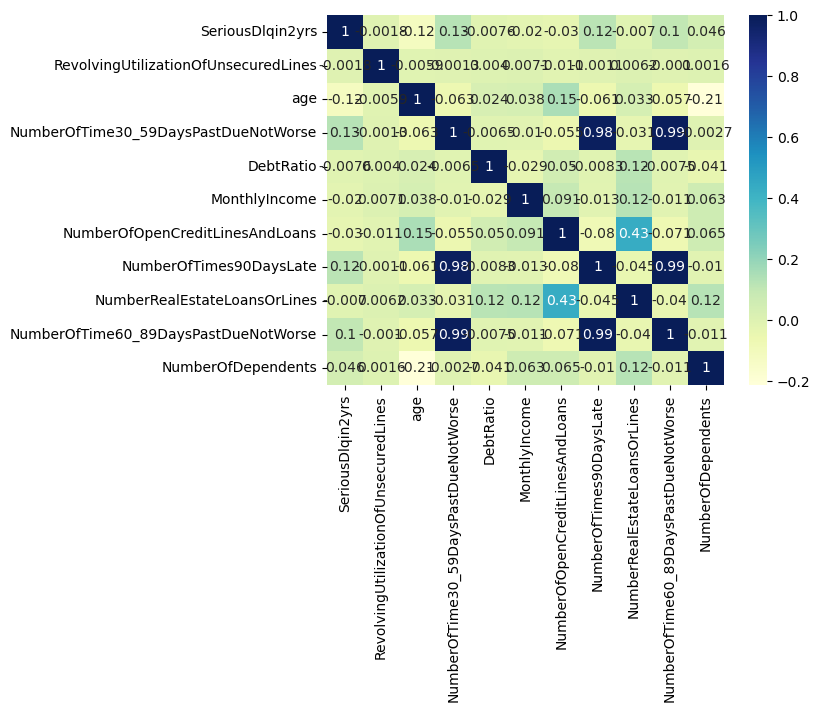

In [10]:
viz.correlation_heatmap(data)

**SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse 

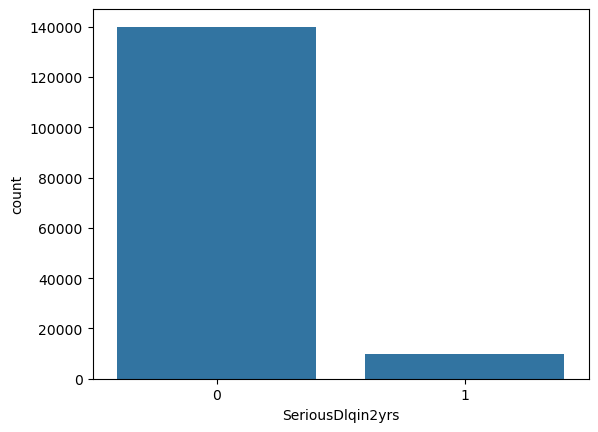

In [11]:
_ = sns.countplot(x=data["SeriousDlqin2yrs"])

In [12]:
data["SeriousDlqin2yrs"].mean()

np.float64(0.06684)

In [13]:
good = data[data["SeriousDlqin2yrs"] == 0]
bad = data[data["SeriousDlqin2yrs"] == 1]

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

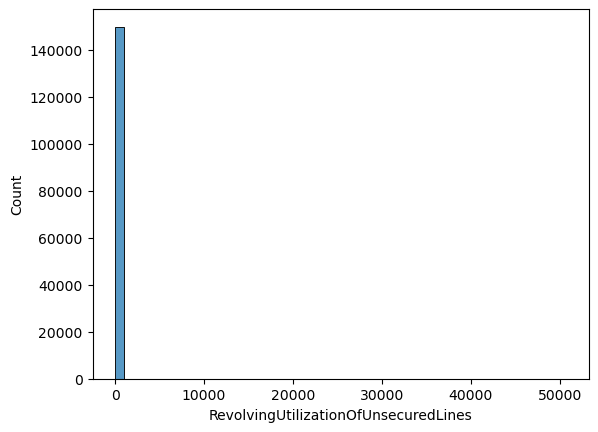

In [14]:
_ = sns.histplot(data["RevolvingUtilizationOfUnsecuredLines"], bins=50)

In [15]:
data["RevolvingUtilizationOfUnsecuredLines"].median()

0.154180737

In [16]:
data[data["RevolvingUtilizationOfUnsecuredLines"] > 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
162,1,1.05,47,1,1.10,5416.00,6,0,2,0,1.00
191,0,1.10,53,5,0.54,3500.00,7,1,1,2,0.00
226,1,1.95,38,0,0.15,3556.00,5,0,0,0,2.00
251,1,1.05,58,7,0.15,3500.00,12,0,0,0,0.00
293,0,2340.00,45,0,0.34,8333.00,7,0,2,0,2.00
...,...,...,...,...,...,...,...,...,...,...,...
149939,0,1.05,26,0,0.07,6500.00,6,0,0,1,0.00
149955,1,1.14,41,2,0.85,7500.00,12,0,4,1,0.00
149962,0,1.01,48,0,0.25,2944.00,4,3,0,0,1.00
149964,0,1.01,63,0,0.61,6015.00,8,0,1,0,0.00


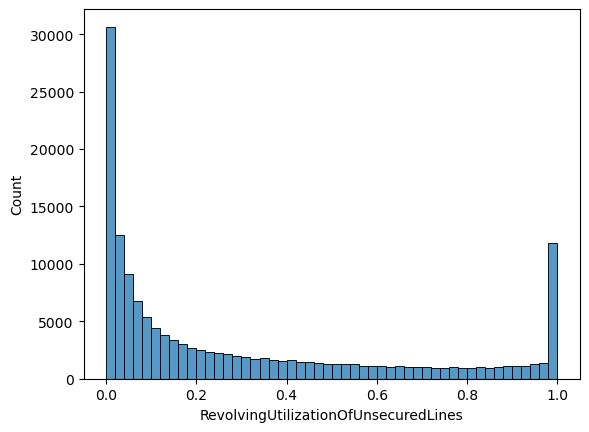

In [17]:
_ = sns.histplot(
    data=data[data["RevolvingUtilizationOfUnsecuredLines"]<=1],
    x="RevolvingUtilizationOfUnsecuredLines",
    bins=50)

With the outliers it has, might be good for WoE binning

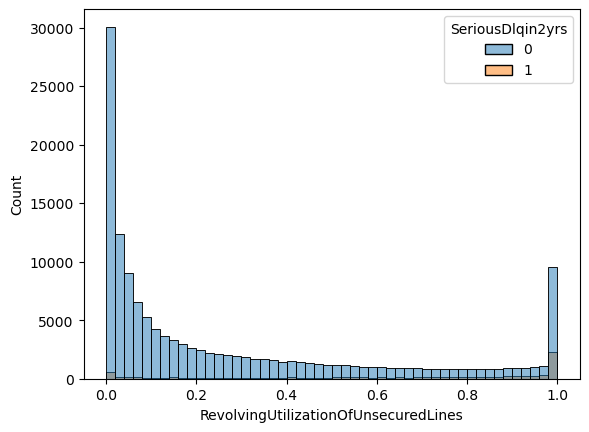

In [18]:
_ = sns.histplot(
    data=data[data["RevolvingUtilizationOfUnsecuredLines"]<=1],
    x="RevolvingUtilizationOfUnsecuredLines",
    hue="SeriousDlqin2yrs",
    bins=50)

Not normal. Do ranksum significance test

In [19]:
ranksums(x=good["RevolvingUtilizationOfUnsecuredLines"], y=bad["RevolvingUtilizationOfUnsecuredLines"])

RanksumsResult(statistic=np.float64(-93.06511928620517), pvalue=np.float64(0.0))

Difference in ranks are statistically significant

**age**: Age of borrower in years

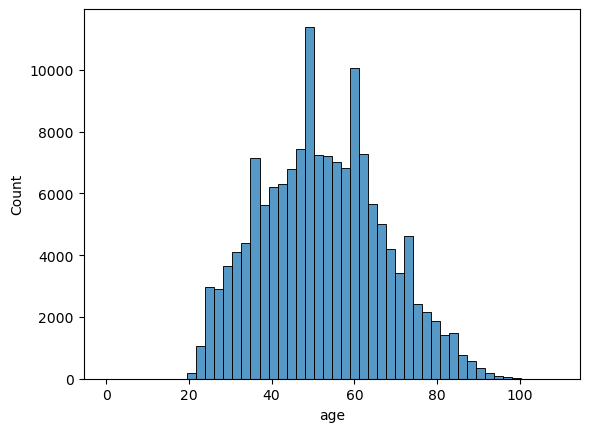

In [20]:
_ = sns.histplot(data["age"], bins=50)

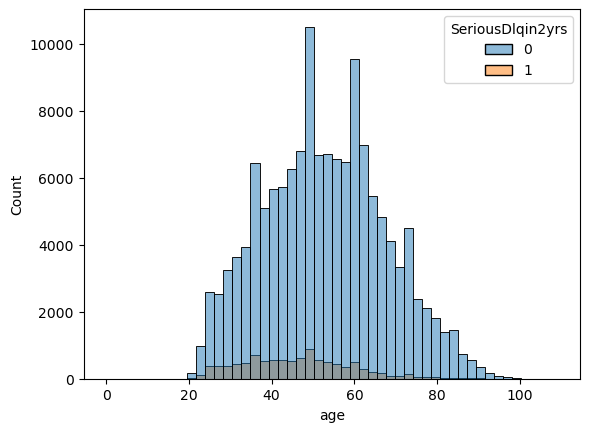

In [21]:
_ = sns.histplot(data=data, x="age", hue="SeriousDlqin2yrs", bins=50)

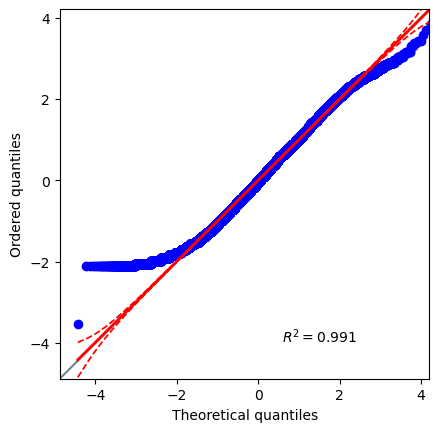

In [22]:
_ = pg.qqplot(data["age"], dist='norm')

Roughly normal except for the ends. Do ztest

In [23]:
ztest(x1=good["age"], x2=bad["age"])

(np.float64(44.98881115466734), np.float64(0.0))

In [24]:
d = pg.compute_effsize(x=good["age"], y=bad["age"])
d

np.float64(0.4651174244592353)

In [25]:
pg.compute_esci(stat=d, nx=good.shape[0], ny=bad.shape[0], eftype='cohen')

array([0.44, 0.49])

Almost medium effect size

**NumberOfTime30_59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

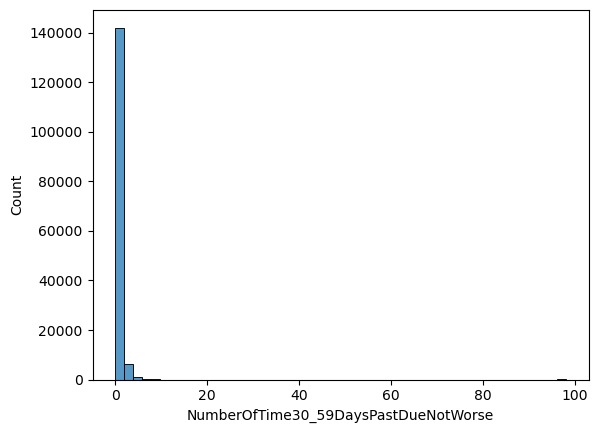

In [26]:
_ = sns.histplot(data["NumberOfTime30_59DaysPastDueNotWorse"], bins=50)

In [27]:
data[data["NumberOfTime30_59DaysPastDueNotWorse"] > 30]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.00,27,98,0.00,2700.00,0,98,0,98,0.00
2286,0,1.00,22,98,0.00,NaN,0,98,0,98,0.00
3884,0,1.00,38,98,12.00,NaN,0,98,0,98,0.00
4417,0,1.00,21,98,0.00,0.00,0,98,0,98,0.00
4705,0,1.00,21,98,0.00,2000.00,0,98,0,98,0.00
...,...,...,...,...,...,...,...,...,...,...,...
147774,1,1.00,68,98,255.00,NaN,0,98,0,98,0.00
149153,1,1.00,24,98,54.00,NaN,0,98,0,98,0.00
149239,0,1.00,26,98,0.00,2000.00,0,98,0,98,0.00
149439,1,1.00,34,98,9.00,NaN,0,98,0,98,0.00


possible outliers. Doesn't seem to make sense that you can be past due more times than the number of days in the bucket

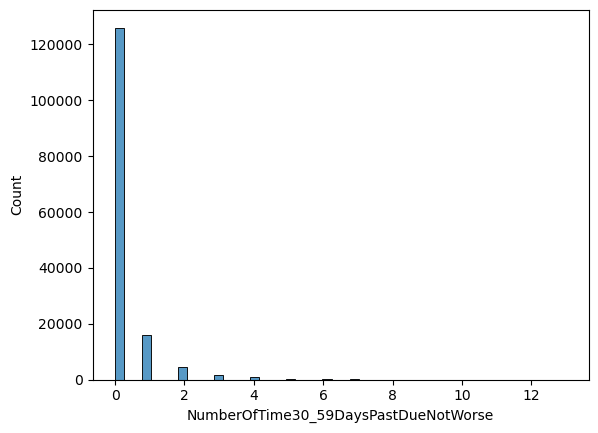

In [28]:
_ = sns.histplot(data=data[data["NumberOfTime30_59DaysPastDueNotWorse"]<=30], x="NumberOfTime30_59DaysPastDueNotWorse", bins=50)

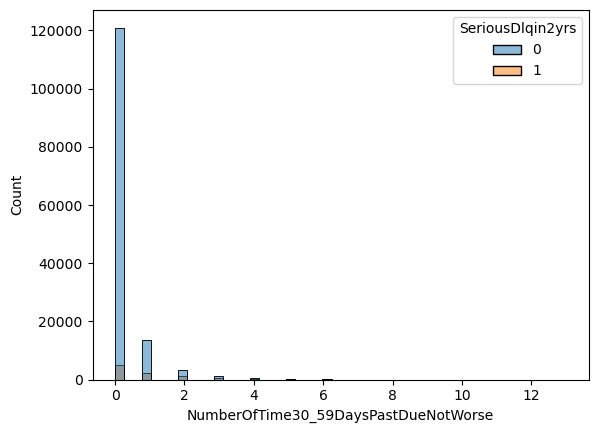

In [29]:
_ = sns.histplot(
    data=data[data["NumberOfTime30_59DaysPastDueNotWorse"]<=30], 
    x="NumberOfTime30_59DaysPastDueNotWorse", 
    hue="SeriousDlqin2yrs",
    bins=50)

In [30]:
data[data["NumberOfTime30_59DaysPastDueNotWorse"]<=30]["NumberOfTime30_59DaysPastDueNotWorse"].unique()

array([ 2,  0,  1,  3,  4,  5,  7, 10,  6, 12,  8,  9, 13, 11])

In [31]:
expected, observed, stats = pg.chi2_independence(data[data["NumberOfTime30_59DaysPastDueNotWorse"]<=30], x="NumberOfTime30_59DaysPastDueNotWorse", y="SeriousDlqin2yrs")

c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:7344: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:7344: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:7341: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [32]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00,11679.07,13.00,0.00,0.28,1.00
1,cressie-read,0.67,9794.39,13.00,0.00,0.26,1.00
2,log-likelihood,0.00,7496.99,13.00,0.00,0.22,1.00
3,freeman-tukey,-0.50,NaN,13.00,NaN,NaN,NaN
4,mod-log-likelihood,-1.00,inf,13.00,0.00,inf,NaN
5,neyman,-2.00,NaN,13.00,NaN,NaN,NaN


In [33]:
expected

SeriousDlqin2yrs,0,1
NumberOfTime30_59DaysPastDueNotWorse,,
0,117703.54,8314.46
1,14975.17,1057.83
2,4294.63,303.37
3,1638.27,115.73
4,697.71,49.29
5,319.44,22.56
6,130.76,9.24
7,50.44,3.56
8,23.35,1.65


In [34]:
observed

SeriousDlqin2yrs,0,1
NumberOfTime30_59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

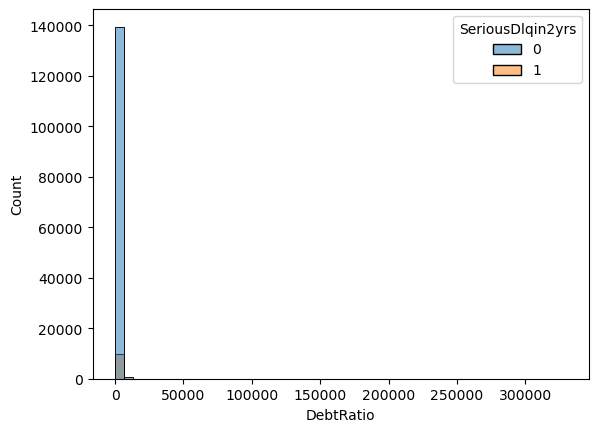

In [35]:
_ = sns.histplot(data=data, x="DebtRatio", hue="SeriousDlqin2yrs", bins=50)

In [36]:
data[data["DebtRatio"] >= 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
6,0,0.31,57,0,5710.00,NaN,8,0,3,0,0.00
8,0,0.12,27,0,46.00,NaN,2,0,0,0,NaN
14,0,0.02,76,0,477.00,0.00,6,0,1,0,0.00
16,0,0.06,78,0,2058.00,NaN,10,0,2,0,0.00
25,1,0.39,50,0,1.60,4676.00,14,0,3,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.00,76,0,60.00,NaN,5,0,0,0,0.00
149977,0,0.24,29,0,349.00,NaN,3,0,0,0,0.00
149984,0,0.04,84,0,25.00,NaN,5,0,0,0,0.00
149992,0,0.87,50,0,4132.00,NaN,11,0,1,0,3.00


In [37]:
data[data["DebtRatio"] == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
52,0,1.00,62,0,0.00,NaN,1,0,0,0,0.00
238,0,1.00,28,0,0.00,NaN,0,0,0,0,NaN
255,0,0.00,23,0,0.00,1725.00,1,0,0,0,0.00
287,0,1.00,62,0,0.00,5480.00,3,0,0,0,0.00
318,0,0.00,59,0,0.00,4200.00,7,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
149898,0,1.00,26,1,0.00,NaN,0,1,0,0,0.00
149901,0,0.00,94,0,0.00,3600.00,4,0,0,0,0.00
149902,0,0.00,80,0,0.00,1600.00,1,0,0,0,0.00
149993,0,1.00,22,0,0.00,820.00,1,0,0,0,0.00


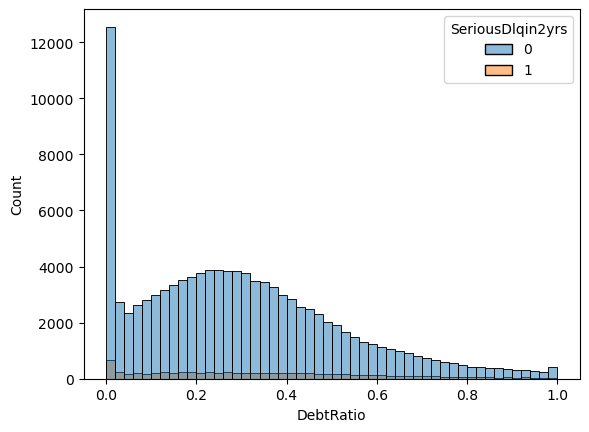

In [38]:
_ = sns.histplot(data=data[data["DebtRatio"] <= 1], x="DebtRatio", hue="SeriousDlqin2yrs", bins=50)

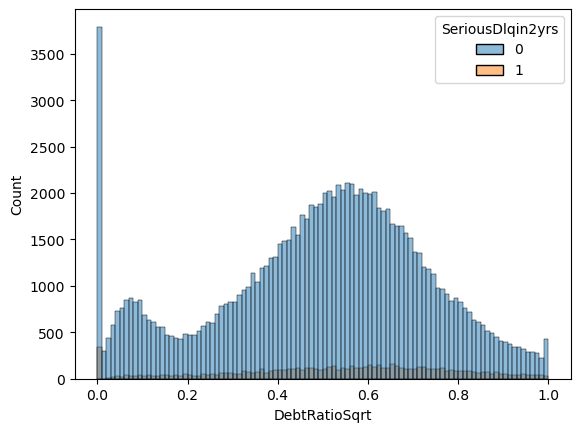

In [39]:
data["DebtRatioSqrt"] = np.sqrt(data["DebtRatio"])
_ = sns.histplot(data=data[data["DebtRatio"] <= 1], x="DebtRatioSqrt", hue="SeriousDlqin2yrs", bins=100)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

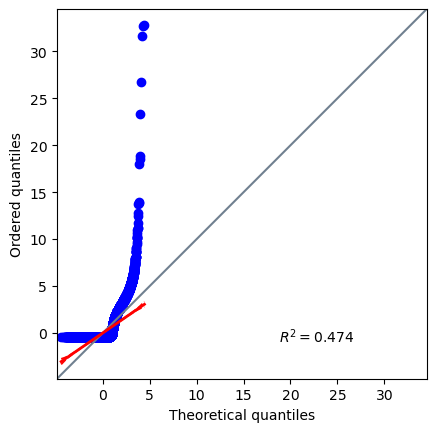

In [40]:
pg.qqplot(data["DebtRatioSqrt"], dist='norm')

In [41]:
good["DebtRatioSqrt"] = np.sqrt(good["DebtRatio"])
bad["DebtRatioSqrt"] = np.sqrt(bad["DebtRatio"])

C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\1584377056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good["DebtRatioSqrt"] = np.sqrt(good["DebtRatio"])
C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\1584377056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad["DebtRatioSqrt"] = np.sqrt(bad["DebtRatio"])


In [42]:
ztest(x1=good["DebtRatioSqrt"], x2=bad["DebtRatioSqrt"])

(np.float64(6.904219724377624), np.float64(5.0480115441034726e-12))

In [43]:
d = pg.compute_effsize(x=good["DebtRatioSqrt"], y=bad["DebtRatioSqrt"])
d

np.float64(0.07137936775130854)

In [44]:
pg.compute_esci(stat=d, nx=good.shape[0], ny=bad.shape[0], eftype='cohen')

array([0.05, 0.09])

Very small effect size

**MonthlyIncome**: Monthly income

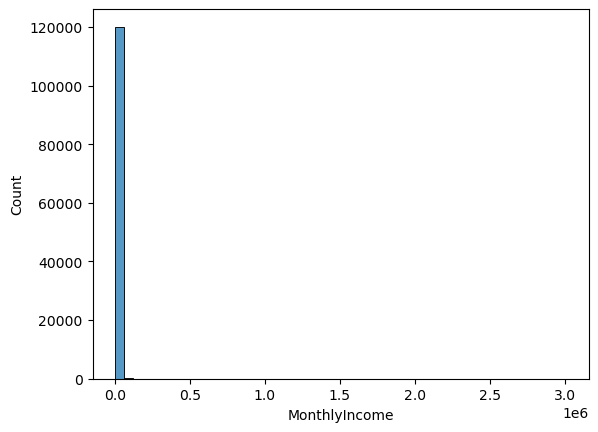

In [45]:
ax = sns.histplot(data["MonthlyIncome"], bins=50)
ax.ticklabel_format(style='plain', axis='y') 

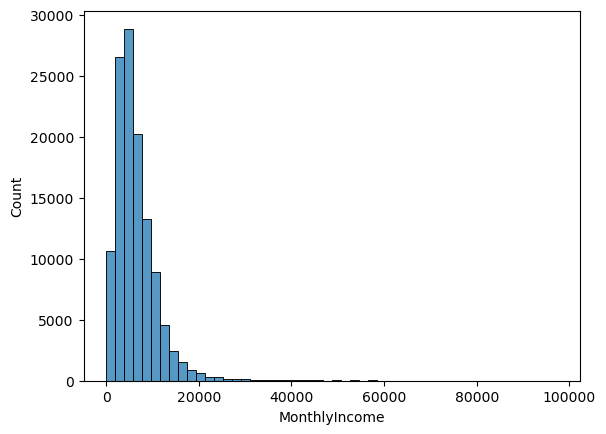

In [46]:
ax = sns.histplot(data = data[data["MonthlyIncome"] < 100000], x="MonthlyIncome", bins=50)

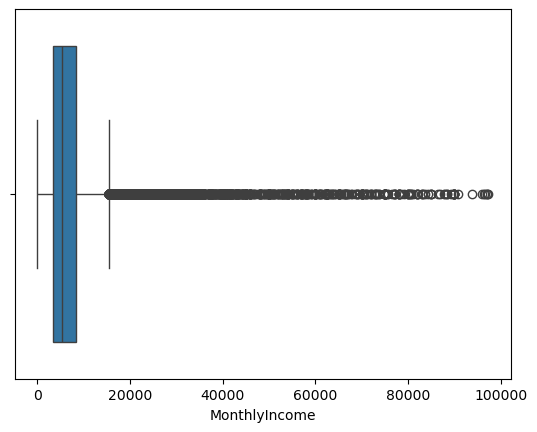

In [47]:
_ = sns.boxplot(data=data[data["MonthlyIncome"] < 100000], x="MonthlyIncome")

In [48]:
print(np.nanpercentile(data["MonthlyIncome"], 25) - (1.5*iqr(data["MonthlyIncome"], nan_policy='omit')))
print(np.nanpercentile(data["MonthlyIncome"], 75) + (1.5*iqr(data["MonthlyIncome"], nan_policy='omit')))

-3873.5
15522.5


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

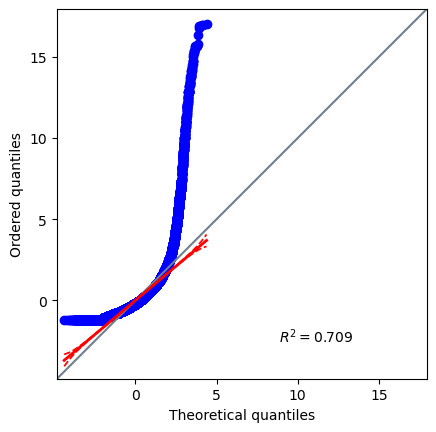

In [49]:
pg.qqplot( data[data["MonthlyIncome"] < 100000]["MonthlyIncome"], dist='norm')

c:\Users\ivan\miniconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


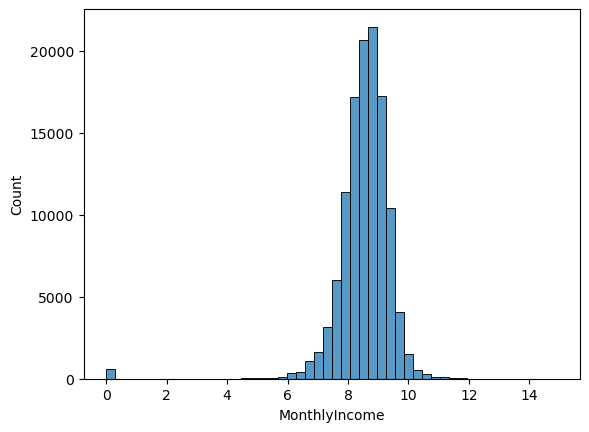

In [50]:
ax = sns.histplot(np.log(data["MonthlyIncome"]), bins=50)
ax.ticklabel_format(style='plain', axis='y') 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

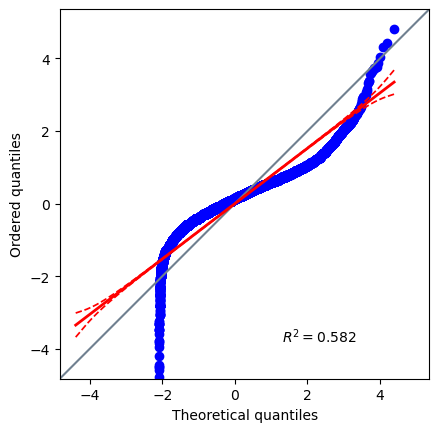

In [51]:
pg.qqplot(np.log(data["MonthlyIncome"].dropna().replace(0, 1)), dist='norm')

In [52]:
data["MonthlyIncomeLog"] = np.log(data["MonthlyIncome"].replace(0, 1))
good["MonthlyIncomeLog"] = np.log(good["MonthlyIncome"].replace(0, 1))
bad["MonthlyIncomeLog"] = np.log(bad["MonthlyIncome"].replace(0, 1))

C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\2561700663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good["MonthlyIncomeLog"] = np.log(good["MonthlyIncome"].replace(0, 1))
C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\2561700663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad["MonthlyIncomeLog"] = np.log(bad["MonthlyIncome"].replace(0, 1))


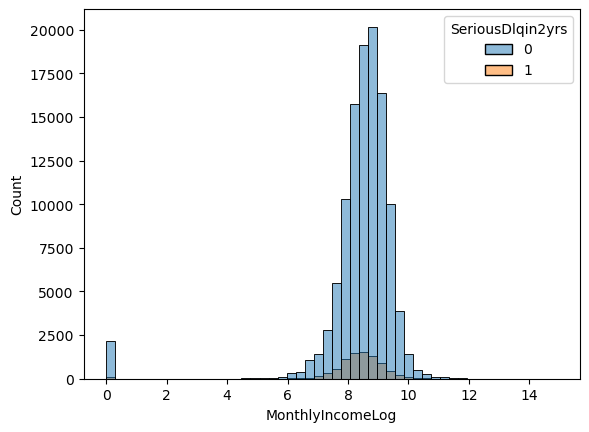

In [53]:
_ = sns.histplot(data=data, x="MonthlyIncomeLog", hue="SeriousDlqin2yrs", bins=50)

In [54]:
d = pg.compute_effsize(x=good["MonthlyIncomeLog"], y=bad["MonthlyIncomeLog"])
d

np.float64(0.06778788998621715)

In [55]:
pg.compute_esci(stat=d, nx=good.shape[0], ny=bad.shape[0], eftype='cohen')

array([0.05, 0.09])

Very small effect size

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

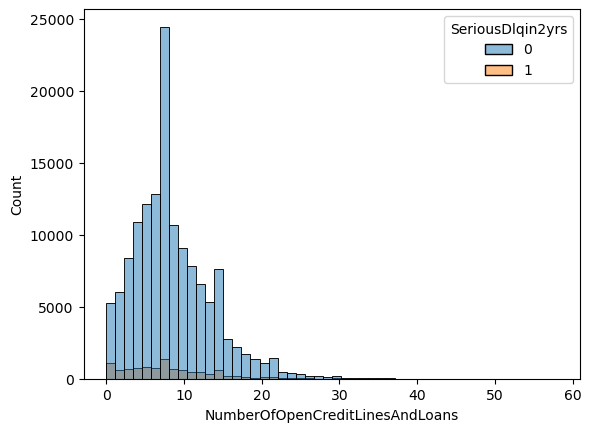

In [56]:
_ = sns.histplot(x=data["NumberOfOpenCreditLinesAndLoans"], hue=data["SeriousDlqin2yrs"], bins=50)

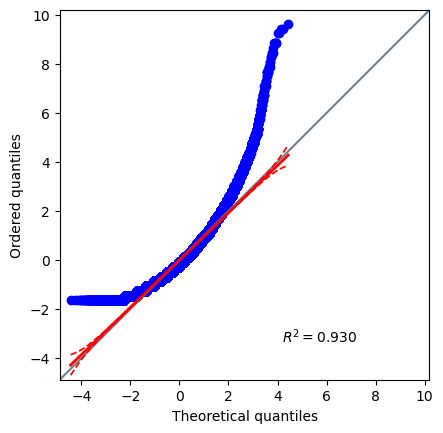

In [57]:
_ = pg.qqplot(data["NumberOfOpenCreditLinesAndLoans"], dist='norm')

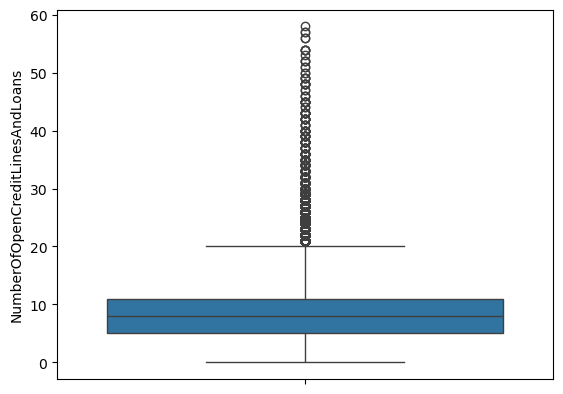

In [58]:
_ = sns.boxplot(data["NumberOfOpenCreditLinesAndLoans"])

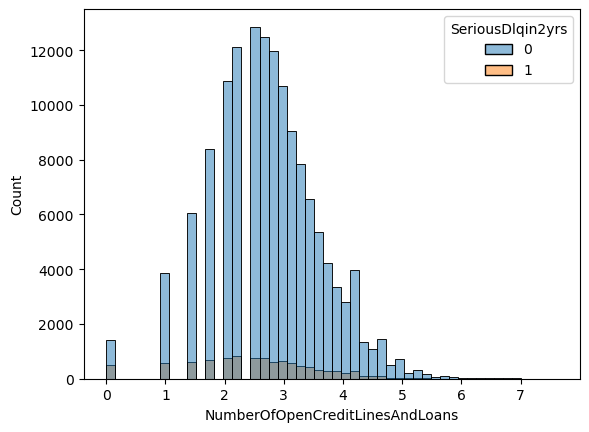

In [59]:
_ = sns.histplot(x=np.sqrt(data["NumberOfOpenCreditLinesAndLoans"]), hue=data["SeriousDlqin2yrs"],bins=50)

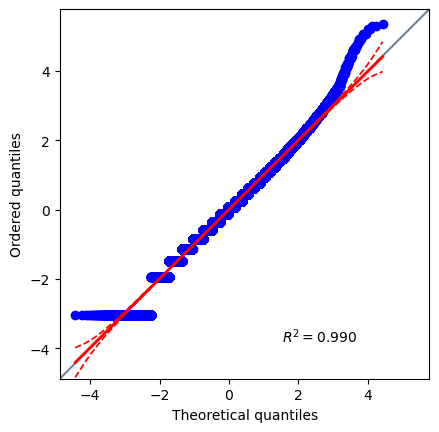

In [60]:
_ = pg.qqplot(np.sqrt(data["NumberOfOpenCreditLinesAndLoans"]), dist='norm')

In [61]:
data["NumberOfOpenCreditLinesAndLoansSqrt"] = np.sqrt(data["NumberOfOpenCreditLinesAndLoans"])
good["NumberOfOpenCreditLinesAndLoansSqrt"] = np.sqrt(good["NumberOfOpenCreditLinesAndLoans"])
bad["NumberOfOpenCreditLinesAndLoansSqrt"] = np.sqrt(bad["NumberOfOpenCreditLinesAndLoans"])

C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\1558582455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good["NumberOfOpenCreditLinesAndLoansSqrt"] = np.sqrt(good["NumberOfOpenCreditLinesAndLoans"])
C:\Users\ivan\AppData\Local\Temp\ipykernel_26772\1558582455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad["NumberOfOpenCreditLinesAndLoansSqrt"] = np.sqrt(bad["NumberOfOpenCreditLinesAndLoans"])


In [62]:
ztest(x1=good["NumberOfOpenCreditLinesAndLoansSqrt"], x2=bad["NumberOfOpenCreditLinesAndLoansSqrt"])

(np.float64(20.234069002544548), np.float64(4.908077834943114e-91))

In [63]:
d = pg.compute_effsize(x=good["NumberOfOpenCreditLinesAndLoansSqrt"], y=bad["NumberOfOpenCreditLinesAndLoansSqrt"])
d

np.float64(0.20919019238892705)

In [64]:
pg.compute_esci(stat=d, nx=good.shape[0], ny=bad.shape[0], eftype='cohen')

array([0.19, 0.23])

Small effect size

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

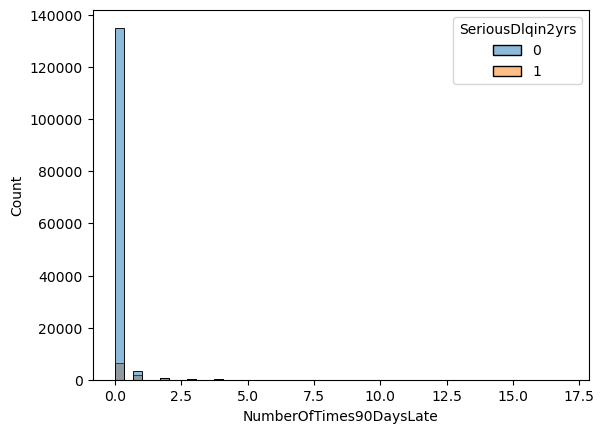

In [65]:
_ = sns.histplot(data=data[data["NumberOfTimes90DaysLate"] < 90], x="NumberOfTimes90DaysLate", hue="SeriousDlqin2yrs", bins=50)

In [66]:
data["NumberOfTimes90DaysLate"].unique()

array([ 0,  1,  3,  2,  5,  4, 98, 10,  9,  6,  7,  8, 15, 96, 11, 13, 14,
       17, 12])

Bin 0 vs >0

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

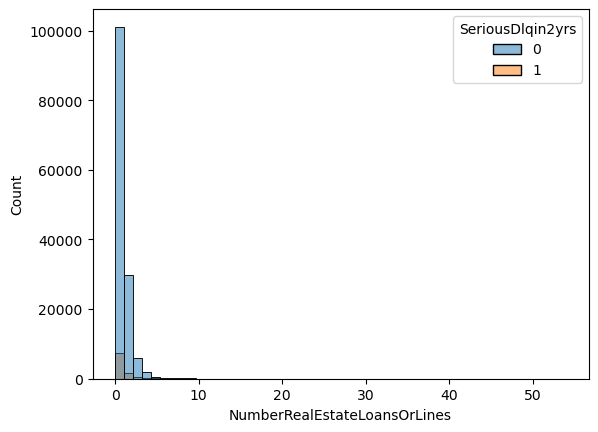

In [67]:
_ = sns.histplot(data=data, x="NumberRealEstateLoansOrLines", hue="SeriousDlqin2yrs", bins=50)

In [68]:
data["NumberRealEstateLoansOrLines"].unique()

array([ 6,  0,  1,  3,  4,  2,  5,  8,  7,  9, 17, 15, 10, 12, 11, 16, 26,
       14, 54, 21, 18, 13, 23, 29, 25, 19, 20, 32])

bin 0 vs >0 

**NumberOfTime60_89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

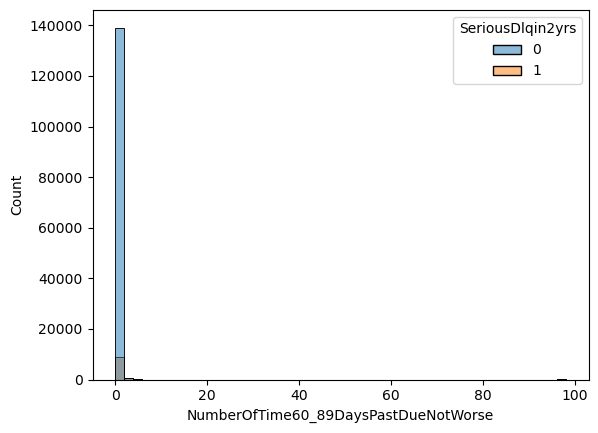

In [69]:
_ = sns.histplot(data=data, x="NumberOfTime60_89DaysPastDueNotWorse", hue="SeriousDlqin2yrs", bins=50)

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

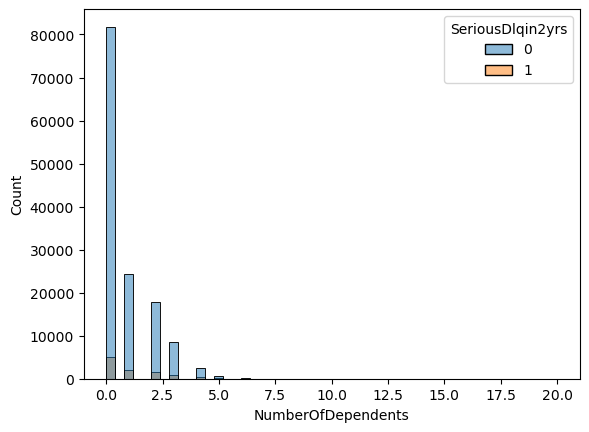

In [70]:
_ = sns.histplot(data=data, x="NumberOfDependents", hue="SeriousDlqin2yrs", bins=50)

In [71]:
data["NumberOfDependents"].unique()

array([ 2.,  1.,  0., nan,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9.,
       13.])

Clean out outliers and missing

In [72]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30_59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60_89DaysPastDueNotWorse        0
NumberOfDependents                       3924
DebtRatioSqrt                               0
MonthlyIncomeLog                        29731
NumberOfOpenCreditLinesAndLoansSqrt         0
dtype: int64

In [73]:
clean = data.dropna(subset="MonthlyIncome")

In [74]:
clean.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30_59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60_89DaysPastDueNotWorse    0
NumberOfDependents                      0
DebtRatioSqrt                           0
MonthlyIncomeLog                        0
NumberOfOpenCreditLinesAndLoansSqrt     0
dtype: int64

In [75]:
transformed_cols = list(data.columns)
transformed_cols.remove("MonthlyIncome")
transformed_cols.remove("NumberOfOpenCreditLinesAndLoans")
transformed_cols.remove("DebtRatio")

Outliers:  
RevolvingUtilizationOfUnsecuredLines > 1  
NumberOfTime30_59DaysPastDueNotWorse > 30  
DebtRatio > 1  
MonthlyIncome > 100000  
NumberOfTimes90DaysLate > 90  
NumberOfTime60_89DaysPastDueNotWorse > 30

In [76]:
clean = clean[clean["RevolvingUtilizationOfUnsecuredLines"] < 1]
clean = clean[clean["NumberOfTime30_59DaysPastDueNotWorse"] < 30]
clean = clean[clean["DebtRatio"] < 1]
clean = clean[clean["MonthlyIncome"] < 100000]
clean = clean[clean["NumberOfTimes90DaysLate"] < 90]
clean = clean[clean["NumberOfTime60_89DaysPastDueNotWorse"] < 30]

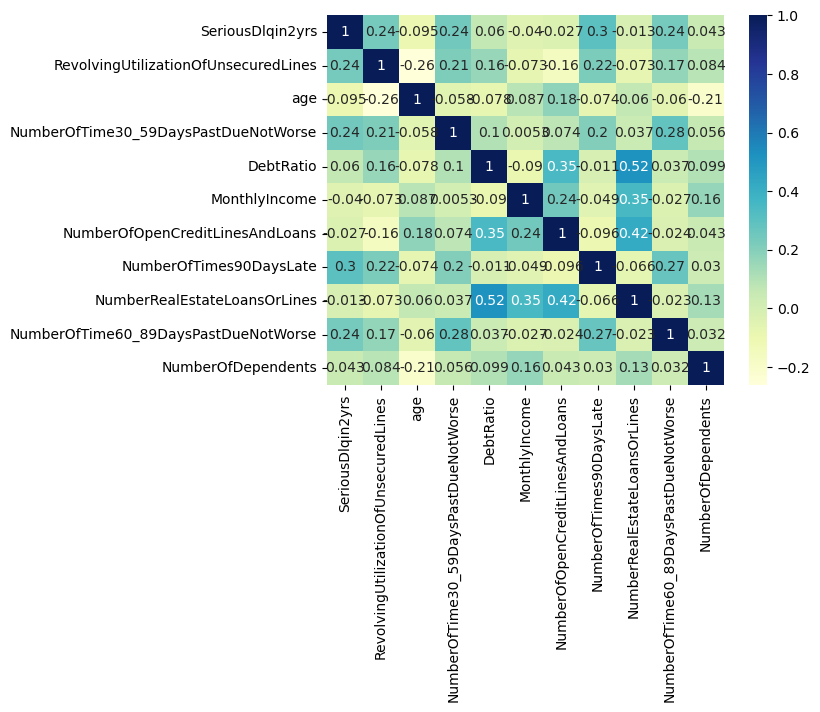

In [77]:
_ = viz.correlation_heatmap(clean[orig_cols])

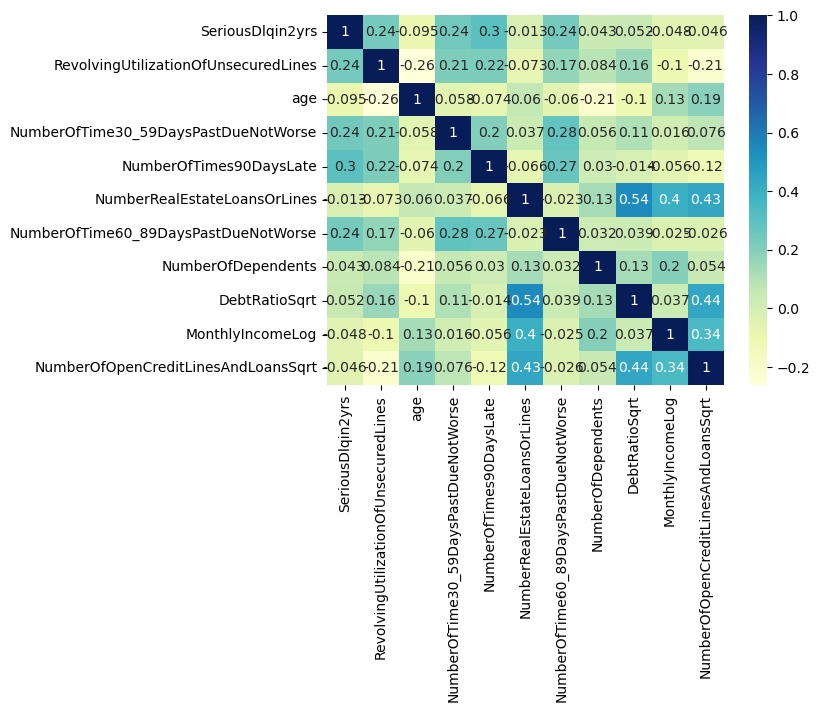

In [78]:
_ = viz.correlation_heatmap(clean[transformed_cols])

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif_data = pd.DataFrame()
vif_data["feature"] = orig_cols
vif_data["VIF"] = [variance_inflation_factor(clean[orig_cols].values, i) for i in range(clean[orig_cols].shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

,feature,VIF
6,NumberOfOpenCreditLinesAndLoans,5.35
2,age,5.02
4,DebtRatio,4.83
8,NumberRealEstateLoansOrLines,3.48
5,MonthlyIncome,3.45
1,RevolvingUtilizationOfUnsecuredLines,2.11
10,NumberOfDependents,1.60
3,NumberOfTime30_59DaysPastDueNotWorse,1.32
0,SeriousDlqin2yrs,1.26
7,NumberOfTimes90DaysLate,1.23


In [81]:
vif_data = pd.DataFrame()
vif_data["feature"] = transformed_cols
vif_data["VIF"] = [variance_inflation_factor(clean[transformed_cols].values, i) for i in range(clean[transformed_cols].shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

,feature,VIF
9,MonthlyIncomeLog,30.17
10,NumberOfOpenCreditLinesAndLoansSqrt,18.27
2,age,15.47
8,DebtRatioSqrt,9.53
5,NumberRealEstateLoansOrLines,2.85
1,RevolvingUtilizationOfUnsecuredLines,2.42
7,NumberOfDependents,1.72
3,NumberOfTime30_59DaysPastDueNotWorse,1.33
0,SeriousDlqin2yrs,1.26
4,NumberOfTimes90DaysLate,1.23


# WOE Binning and IV

In [112]:
bins = sc.woebin(data[transformed_cols], y="SeriousDlqin2yrs")

[INFO] creating woe binning ...


{'DebtRatioSqrt': <Figure size 640x480 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 640x480 with 2 Axes>,
 'NumberOfDependents': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'NumberOfTime30_59DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'MonthlyIncomeLog': <Figure size 640x480 with 2 Axes>,
 'NumberOfTime60_89DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 640x480 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoansSqrt': <Figure size 640x480 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 640x480 with 2 Axes>}

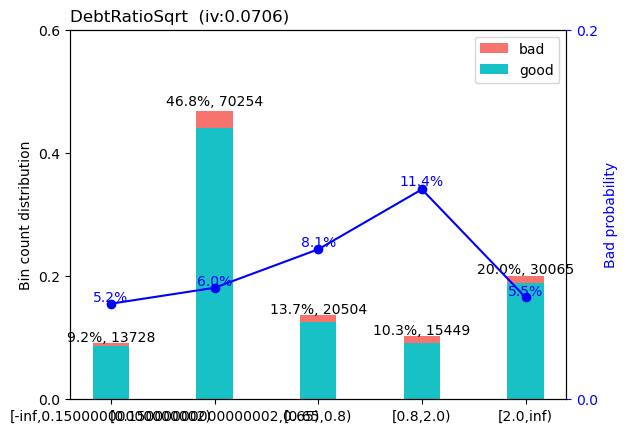

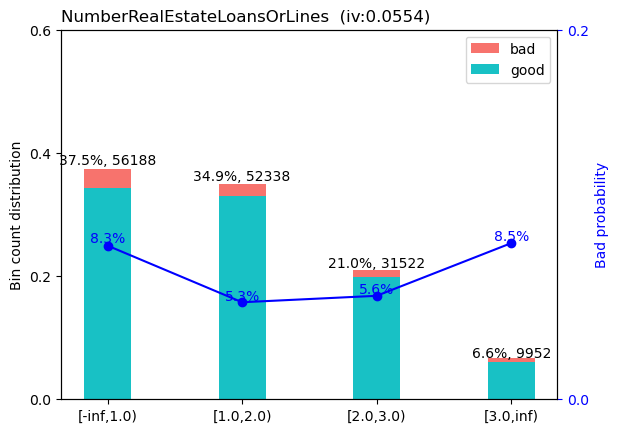

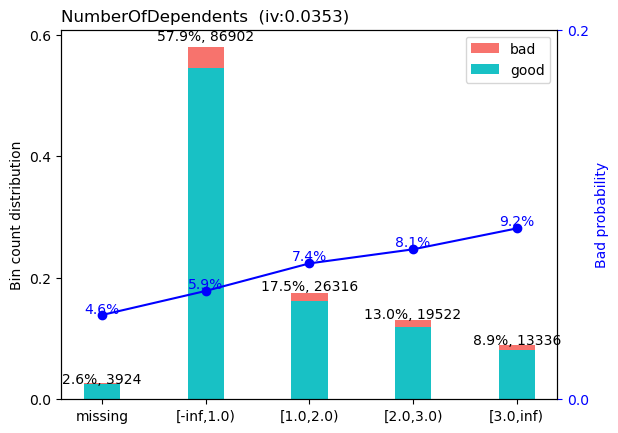

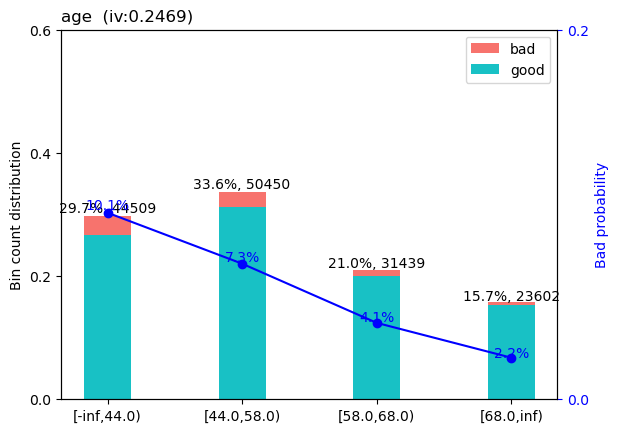

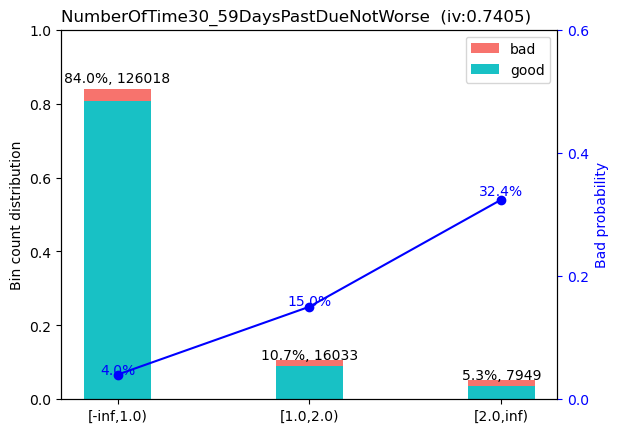

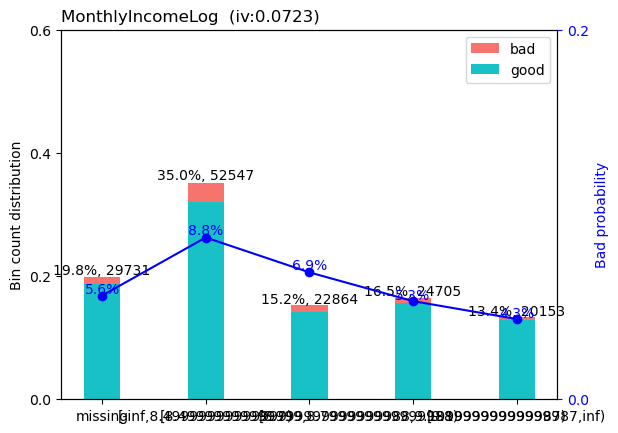

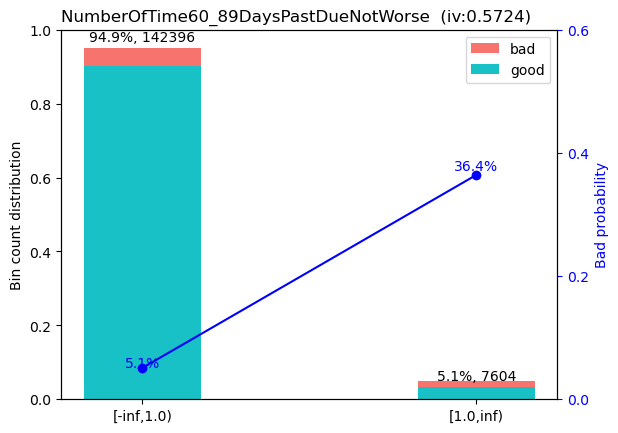

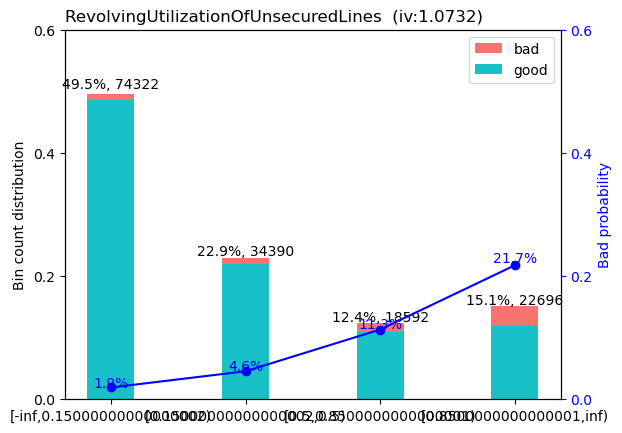

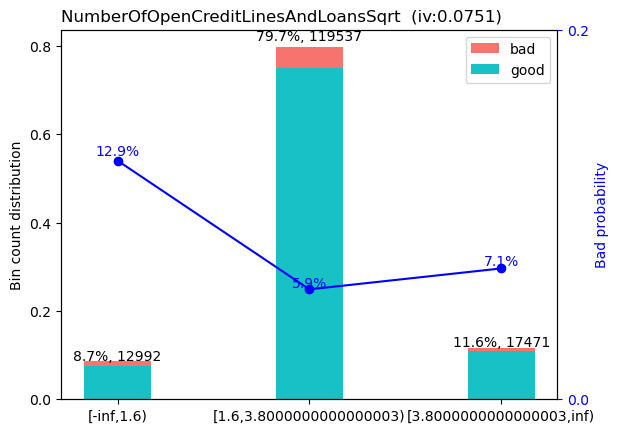

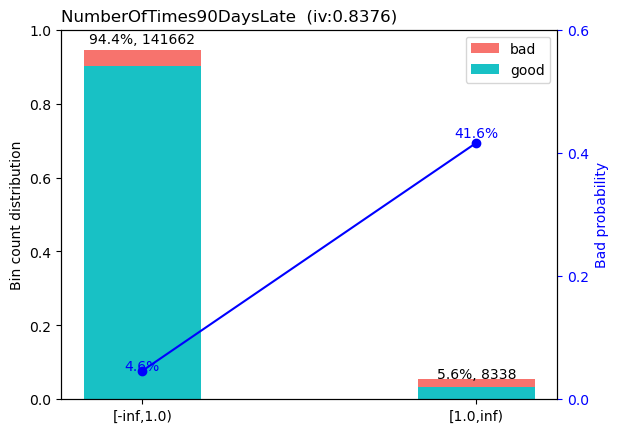

In [113]:
sc.woebin_plot(bins)

In [114]:
bins['RevolvingUtilizationOfUnsecuredLines']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,RevolvingUtilizationOfUnsecuredLines,"[-inf,0.15000000000000002)",74322,0.50,72900,1422,0.02,-1.30,0.49,1.07,0.15000000000000002,False
1,RevolvingUtilizationOfUnsecuredLines,"[0.15000000000000002,0.5)",34390,0.23,32825,1565,0.05,-0.41,0.03,1.07,0.5,False
2,RevolvingUtilizationOfUnsecuredLines,"[0.5,0.8500000000000001)",18592,0.12,16487,2105,0.11,0.58,0.05,1.07,0.8500000000000001,False
3,RevolvingUtilizationOfUnsecuredLines,"[0.8500000000000001,inf)",22696,0.15,17762,4934,0.22,1.36,0.50,1.07,inf,False


In [115]:
bins['DebtRatioSqrt']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DebtRatioSqrt,"[-inf,0.15000000000000002)",13728,0.09,13018,710,0.05,-0.27,0.01,0.07,0.15000000000000002,False
1,DebtRatioSqrt,"[0.15000000000000002,0.65)",70254,0.47,66015,4239,0.06,-0.11,0.01,0.07,0.65,False
2,DebtRatioSqrt,"[0.65,0.8)",20504,0.14,18840,1664,0.08,0.21,0.01,0.07,0.8,False
3,DebtRatioSqrt,"[0.8,2.0)",15449,0.10,13694,1755,0.11,0.58,0.04,0.07,2.0,False
4,DebtRatioSqrt,"[2.0,inf)",30065,0.20,28407,1658,0.06,-0.20,0.01,0.07,inf,False


In [116]:
bins['MonthlyIncomeLog']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MonthlyIncomeLog,missing,29731,0.20,28062,1669,0.06,-0.19,0.01,0.07,missing,True
1,MonthlyIncomeLog,"[-inf,8.49999999999999)",52547,0.35,47947,4600,0.09,0.29,0.03,0.07,8.49999999999999,False
2,MonthlyIncomeLog,"[8.49999999999999,8.799999999999988)",22864,0.15,21294,1570,0.07,0.03,0.00,0.07,8.799999999999988,False
3,MonthlyIncomeLog,"[8.799999999999988,9.199999999999987)",24705,0.16,23393,1312,0.05,-0.24,0.01,0.07,9.199999999999987,False
4,MonthlyIncomeLog,"[9.199999999999987,inf)",20153,0.13,19278,875,0.04,-0.46,0.02,0.07,inf,False


# Logistic Regression

In [117]:
train, test = sc.split_df(data[transformed_cols], y="SeriousDlqin2yrs").values()

In [118]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [119]:
train_woe.columns

Index(['SeriousDlqin2yrs', 'DebtRatioSqrt_woe',
       'NumberRealEstateLoansOrLines_woe', 'NumberOfDependents_woe', 'age_woe',
       'NumberOfTime30_59DaysPastDueNotWorse_woe', 'MonthlyIncomeLog_woe',
       'NumberOfTime60_89DaysPastDueNotWorse_woe',
       'RevolvingUtilizationOfUnsecuredLines_woe',
       'NumberOfOpenCreditLinesAndLoansSqrt_woe',
       'NumberOfTimes90DaysLate_woe'],
      dtype='object')

In [120]:
from statsmodels.formula.api import logit

In [121]:
f = 'SeriousDlqin2yrs ~ \
NumberOfDependents_woe + \
DebtRatioSqrt_woe + \
NumberOfTime30_59DaysPastDueNotWorse_woe + \
NumberRealEstateLoansOrLines_woe + \
MonthlyIncomeLog_woe + \
NumberOfTimes90DaysLate_woe + \
NumberOfTime60_89DaysPastDueNotWorse_woe + \
age_woe + \
RevolvingUtilizationOfUnsecuredLines_woe + \
NumberOfOpenCreditLinesAndLoansSqrt_woe'

In [122]:
log_reg_woe = logit(
    formula=f, 
    data=train_woe
).fit_regularized()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18319476244311433
            Iterations: 82
            Function evaluations: 82
            Gradient evaluations: 82


In [123]:
log_reg_woe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104989
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                  0.2534
Time:                        10:18:26   Log-Likelihood:                -19235.
converged:                       True   LL-Null:                       -25765.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.6127      0.015   -172.252      0.000      -2.642      -2.583
NumberOfDependents_woe                       0.1617      0.077      2.101      0.036       0.011       0.313
DebtRatioSqrt_woe                            0.9313      0.055     16.887      0.000       0.823       1.039
NumberOfTime30_59DaysPastDueNotWorse_woe     0.5258      0.015     33.954      0.000       0.495       0.556
NumberRealEstateLoansOrLines_woe             0.6100      0.065      9.352      0.000       0.482       0.738
MonthlyIncomeLog_woe                         0.1087      0.055      1.981      0.048       0.001       0.216
NumberOfTimes90DaysLate_woe                  0.5535      0.014     40.319      0.000       0.527       0.580
NumberOfTime60_89DaysPastDueNotWorse_woe     0.4057      0.017     24.074      0.000       0.373       0.439
age_woe                                      0.4283      0.033     13.115      0.000       0.364       0.492
RevolvingUtilizationOfUnsecuredLines_woe     0.5964      0.015     39.427      0.000       0.567       0.626
NumberOfOpenCreditLinesAndLoansSqrt_woe      0.1341      0.052      2.576      0.010       0.032       0.236
============================================================================================================
"""

In [124]:
y_train = train_woe["SeriousDlqin2yrs"]
y_test = test_woe["SeriousDlqin2yrs"]
X_train = train_woe.drop(columns="SeriousDlqin2yrs")
X_test = test_woe.drop(columns="SeriousDlqin2yrs")
train_proba = log_reg_woe.predict(X_train)
test_proba = log_reg_woe.predict(X_test)

In [125]:
train_proba

0        0.30
1        0.10
2        0.43
3        0.04
4        0.12
         ... 
149990   0.02
149991   0.01
149993   0.10
149994   0.03
149998   0.02
Length: 105000, dtype: float64

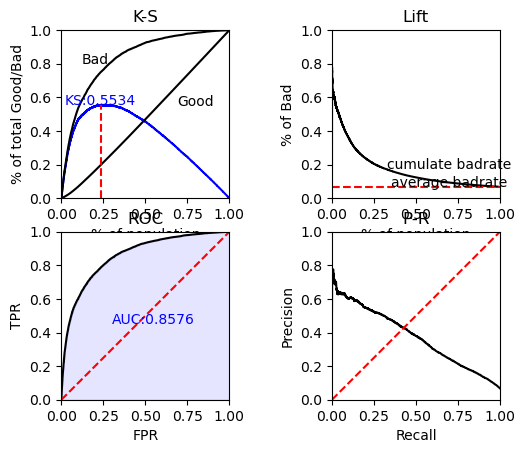

{'KS': np.float64(0.5534),
 'AUC': np.float64(0.8576),
 'Gini': np.float64(0.7153),
 'pic': <Figure size 640x480 with 4 Axes>}

In [126]:
sc.perf_eva(y_train, train_proba, plot_type = ["ks","lift","roc","pr"])

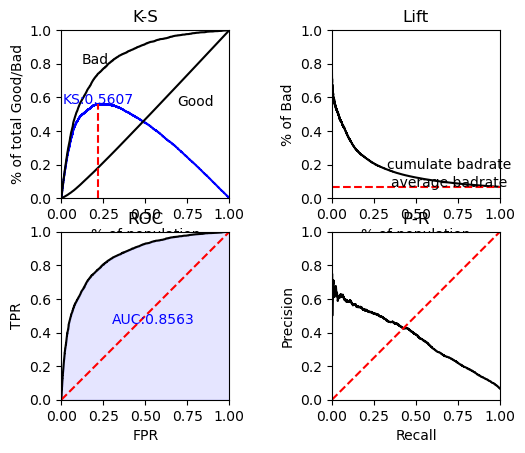

{'KS': np.float64(0.5607),
 'AUC': np.float64(0.8563),
 'Gini': np.float64(0.7126),
 'pic': <Figure size 640x480 with 4 Axes>}

In [127]:
sc.perf_eva(y_test, test_proba, plot_type = ["ks","lift","roc","pr"])

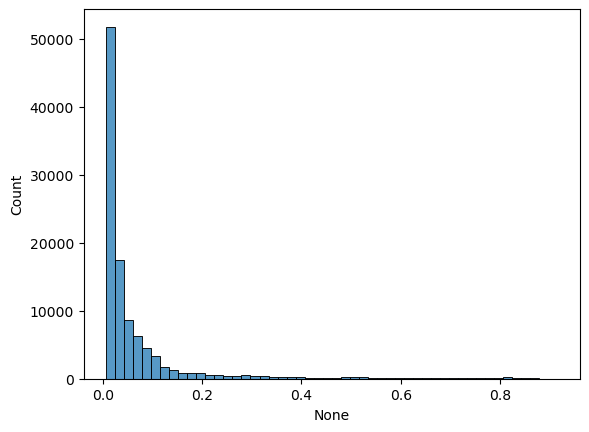

In [129]:
_ = sns.histplot(x=train_proba, bins=50)

In [130]:
train_decile = pd.qcut(train_proba, q=10, labels=False, duplicates='drop')

In [132]:
train_decile

0         9
1         8
2         9
3         6
4         8
         ..
149990    4
149991    2
149993    8
149994    5
149998    3
Length: 105000, dtype: int64